<a href="https://colab.research.google.com/github/riyazahmadshaik/computationalmethods-5731/blob/master/In_class_exercise_09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **The ninth in-class-exercise (20 points in total, 11/11/2020)**

The purpose of the exercise is to practice different machine learning algorithms for text classification as well as the performance evaluation. In addition, you are requried to conduct *10 fold cross validation (https://scikit-learn.org/stable/modules/cross_validation.html)* in the training. 

The dataset can be download from here: https://github.com/unt-iialab/INFO5731_FALL2020/blob/master/In_class_exercise/exercise09_datacollection.zip. The dataset contains two files train data and test data for sentiment analysis in IMDB review, it has two categories: 1 represents positive and 0 represents negative. You need to split the training data into training and validate data (80% for training and 20% for validation, https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6) and perform 10 fold cross validation while training the classifier. The final trained model was final evaluated on the test data. 

Algorithms:

(1) MultinominalNB

(2) SVM 

(3) KNN 

(4) Decision tree

(5) Random Forest

(6) XGBoost

Evaluation measurement:

(1) Accuracy

(2) Recall

(3) Precison 

(4) F-1 score

In [8]:
# Write your code here
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_validate, StratifiedKFold
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
import pandas as pd
import numpy as np


In [9]:
with open('stsa-train.txt') as fin:
    data = fin.readlines()
with open('stsa-test.txt') as fin:
    data.extend(fin.readlines())

In [10]:
target = [x[0] for x in data]
text = [x.strip()[2:] for x in data]

In [11]:

df = pd.DataFrame({'text' : text, 'target': target})
df.head()

,text,target
0,"a stirring , funny and finally transporting re...",1
1,apparently reassembled from the cutting-room f...,0
2,they presume their audience wo n't sit still f...,0
3,this is a visually stunning rumination on love...,1
4,jonathan parker 's bartleby should have been t...,1


In [12]:
from nltk import word_tokenize
from string import punctuation

In [13]:
def remove_punctuation(row):
    return [w for w in row if w not in punctuation]

In [14]:
import nltk
nltk.download('punkt')
df.text = df.text.apply(word_tokenize)
df.text = df.text.apply(remove_punctuation)
df.text = df.text.apply(lambda x: [w.lower() for w in x])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [15]:
X = df.text.apply(lambda x: ' '.join(x)).values
y = df.target.apply(lambda x: int(x)).values

In [16]:
train_X, test_X, train_y, test_y = train_test_split(X, y,
test_size=0.2, random_state=1)

In [17]:
try:
    from xgboost import XGBClassifier
except ImportError ('Installing XGBoost...'):
    !pip install xgboost

In [18]:
naive_bayes = MultinomialNB()
svc = SVC()
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
xgb = XGBClassifier()
models = [naive_bayes, svc, knn, dt, rf, xgb]
names = ['nb', 'svc', 'knn', 'dt', 'rf', 'xgb']
estimators = []
for name, model in zip(names, models):
    clf = Pipeline([('vect', CountVectorizer()), (name, model)])
    estimators.append(clf)

In [19]:
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)

In [20]:
scores = {name : None for name in names}
scoring = {'accuracy_score' : 'accuracy',
           'precision_score' : 'precision',
           'recall_score' : 'recall', 
           'f1_score' : 'f1'}
for name, clf in zip(names, estimators):
    scores[name] = cross_validate(clf, train_X, train_y, cv=cv, scoring=scoring)

In [21]:
def get_dict():
    return {name : None for name in names}
accuracy_scores = get_dict()
precision_scores = get_dict()
recall_scores = get_dict()
f1_scores = get_dict()
estimator_names = list(scores.keys())
for name in scores.keys():
    for score, d in zip(['accuracy_score', 'precision_score',
                         'recall_score', 'f1_score'],
                        [accuracy_scores, precision_scores,
                         recall_scores, f1_scores]):
        score_name = 'test_' + score
        d[name] = scores[name][score_name]

In [22]:
def get_mean_scores(d):
    return [(name, np.mean(value)) for name, value in d.items()]

In [23]:
accuracy_mean = get_mean_scores(accuracy_scores)
precision_mean = get_mean_scores(precision_scores)
recall_mean = get_mean_scores(recall_scores)
f1_mean = get_mean_scores(f1_scores)

In [24]:

from matplotlib import pyplot as plt

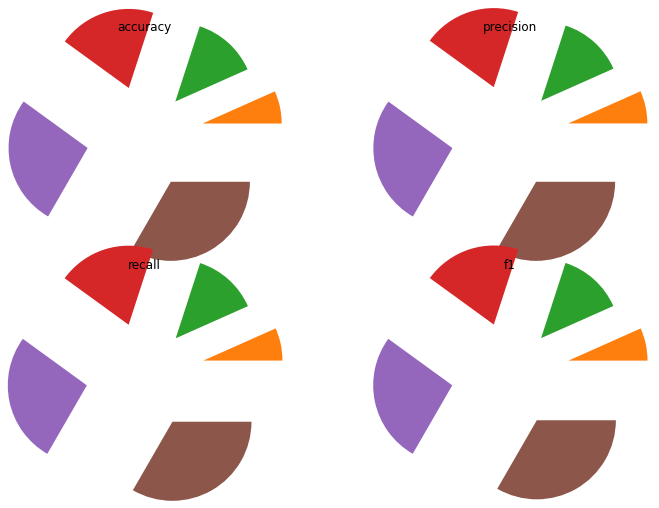

In [27]:
fig, axes = plt.subplots(2,2)
fig.set_size_inches(12, 8)
axes = axes.flatten()
for ax, t, title in zip(axes, [accuracy_mean, precision_mean, recall_mean, f1_mean],
                 ['accuracy', 'precision', 'recall', 'f1']):
    ax.pie(range(len(names)), [mean for _, mean in t])
    ax.set_title(title)


In [28]:
def print_mean_scores(t, scoring_name):
    for name, score in t:
        print(name, 'mean', scoring_name, 'score is', score)

In [29]:
for t, name in zip([accuracy_mean, precision_mean, recall_mean, f1_mean], 
                   ['accuracy', 'precision', 'recall', 'f1']):
    print_mean_scores(t, name)
    print('+'*79)

nb mean accuracy score is 0.798486409155937
svc mean accuracy score is 0.7534344982628245
knn mean accuracy score is 0.5855332107091764
dt mean accuracy score is 0.6374461475577354
rf mean accuracy score is 0.733271408134069
xgb mean accuracy score is 0.6696202738606172
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
nb mean precision score is 0.8024684155514825
svc mean precision score is 0.7588481422866838
knn mean precision score is 0.5978716457601168
dt mean precision score is 0.6483826380320934
rf mean precision score is 0.7392204169942053
xgb mean precision score is 0.6699047142038436
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
nb mean recall score is 0.8069103992571959
svc mean recall score is 0.7635043330238317
knn mean recall score is 0.5926671309192201
dt mean recall score is 0.6433116682141751
rf mean recall score is 0.7434842154131849
xgb mean recall score is 0.7098204890126897
+++++++++++++++++++++++++++++

In [30]:
clf = Pipeline([('vect', CountVectorizer()), ('nb', MultinomialNB())])
clf.fit(train_X, train_y)
predictions = clf.predict(test_X)
print('Test accuracy score is: {}'.format(accuracy_score(test_y, predictions)))
print('Test precision score is: {}'.format(precision_score(test_y, predictions)))
print('Test recall score is: {}'.format(recall_score(test_y, predictions)))
print('Test F1 score is: {}'.format(f1_score(test_y, predictions)))

Test accuracy score is: 0.8078902229845626
Test precision score is: 0.829050279329609
Test recall score is: 0.8021621621621622
Test F1 score is: 0.8153846153846154
